In [1]:
import os
base_dir = 'E:/Python/MachineLearning/cat_dog/traindata_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [16]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

Found 17998 images belonging to 2 classes.


In [14]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

Found 17998 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6925 - acc: 0.5222 - val_loss: 0.6807 - val_acc: 0.5952
Epoch 2/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6774 - acc: 0.5722 - val_loss: 0.6886 - val_acc: 0.5370
Epoch 3/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6646 - acc: 0.5887 - val_loss: 0.6329 - val_acc: 0.6530
Epoch 4/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6583 - acc: 0.6009 - val_loss: 0.6409 - val_acc: 0.6330
Epoch 5/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6392 - acc: 0.6384 - val_loss: 0.5704 - val_acc: 0.7074
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6295 - acc: 0.6378 - val_loss: 0.5778 - val_acc: 0.7000
Epoch 7/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6121 - acc: 0.6594 - val_loss: 0.5918 - val_acc: 0.6930
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4598 - acc: 0.7853 - val_loss: 0.4065 - val_acc: 0.8156
Epoch 62/100
100/100 [==============================] - 23s 230ms/step - loss: 0.4552 - acc: 0.7824 - val_loss: 0.4015 - val_acc: 0.8130
Epoch 63/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4385 - acc: 0.7931 - val_loss: 0.4696 - val_acc: 0.7950
Epoch 64/100
100/100 [==============================] - 22s 217ms/step - loss: 0.4534 - acc: 0.7903 - val_loss: 0.3812 - val_acc: 0.8280
Epoch 65/100
100/100 [==============================] - 23s 235ms/step - loss: 0.4579 - acc: 0.7837 - val_loss: 0.3561 - val_acc: 0.8497
Epoch 66/100
100/100 [==============================] - 21s 215ms/step - loss: 0.4636 - acc: 0.7869 - val_loss: 0.4965 - val_acc: 0.7530
Epoch 67/100
100/100 [==============================] - 22s 222ms/step - loss: 0.4475 - acc: 0.7903 - val_loss: 0.4067 - val_acc: 0.8140
Epoch 68/100
100/100 [===================

In [20]:
model.save('cats_and_dogs_small.md')

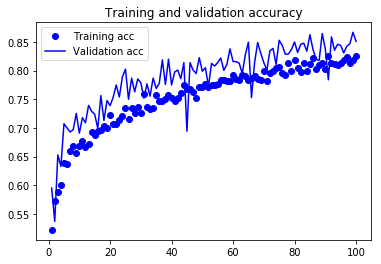

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

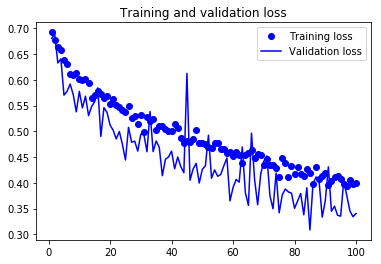

In [24]:

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()